# Autoindexing algorithm

We use the approach of Steller et al. (1997) to determine the likely unit vectors $\mathbf{t}$ form the basis.

A set of unit vectors $\{\mathbf{t}\}$ is generated by evenly distributing points on the unit hemisphere in reciprocal space (the [Fibonacci algorithm](https://stackoverflow.com/questions/9600801/evenly-distributing-n-points-on-a-sphere)). The $\mathbf{q}$-vectors $\mathbf{x}$ are computed from the positions of the peaks in the detected diffraction pattern. For each $\mathbf{t}$, the dot product $p = \mathbf{x}\cdot\mathbf{t}$ is taken for all $\mathbf{x}$ and used to construct a histogram (bin width $\Delta p$) $f(p)$.

Peaks in the power spectrum of this function, the Fourier transform $\tilde{F}(k)$ correspond to strong periodicities in the direction $\mathbf{t}$. The first and largest peak at $k=0$ corresponds to the number of vectors used to construct the histogram. The first peak at $k=l (k \ne 0)$ is the frequency of the reciprocal lattice plane, and the real-space position of the real lattice. Thus the length of the real space lattice vector is 

\begin{align}
d = \frac{l}{m\Delta p},
\end{align}

where m is the index of the histogram bin for $k=l$.

We compile a list of $\mathbf{t}$-vectors with the largest $|\tilde{F}(l)|$. Each direction is refined with a fine grid search to maximise this value. Directions which are colinear duplicates are rejected, and the list is sorted to approximately 20 candidate vectors. 3 directions from this list are chosen to be the bases, the others are linear combinations, false periodicities or a second lattice.

# Parameters in Indexing panel of NSXTool GUI


```
Max. Cell. dim. - Maximum lattice vector size, in Angstrom.
Q Vertices      - Number of trial vectors on unit hemisphere, t
Subdivisions    - Grid spacing between lattice planes
Solutions       - Number of candidate lattices for the unit cell
Min. Volume     - Minimum cell volume in Angstrom^3
Indexing Tol.   - ???
```

# If autoindexing fails...

* Make peak filter less permissive (discard more weak peaks)
* Change grid spacing for histogram

# Failure of autoindexing for streptavidin + biotin

NSXTool fails to find *any* unit cell for the new system (strep); clicking the "find unit cells" returns no results in most cases.

The following code fragment is suspicious (```core/algo/FFTIndexing.cpp:109```):

```
if (current < 0.7 * FZero)
    continue;
```

i.e. discard any peak that is less than 70% the magnitude of the zero ($k=0$) peak. This was discarding all possible $\mathbf{t}$-vectors in the case of strep. There is no justification in the literature for this line, so from this point onwards I have commented it out. I suspect it may be a value that works for trypsin.


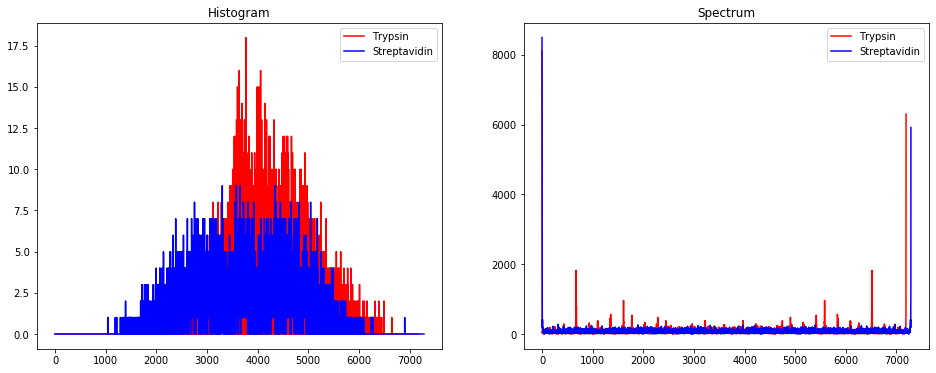

In [1]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

%matplotlib inline
trypsin_hist = np.loadtxt('trypsin-index-histogram-2')
trypsin_spec = np.loadtxt('trypsin-index-spectrum-2')
strep_hist = np.loadtxt('strep-index-histogram-1001')
strep_spec = np.loadtxt('strep-index-spectrum-1001')

figure(num=None, figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Histogram')
plt.plot(trypsin_hist, 'r-', label='Trypsin')
plt.plot(strep_hist, 'b-', label='Streptavidin')
plt.legend()
plt.subplot(1,2,2)
plt.title('Spectrum')
plt.plot(trypsin_spec, 'r-', label='Trypsin')
plt.plot(strep_spec, 'b-', label='Streptavidin')
plt.legend()
plt.show()

There are thousands of such histograms, but the the trypsin spectra have a periodicity that the strep spectra lack in all cases I looked at. This seems to suggest either an incorrect setting for the detector or incorrect histogram binning.